<a href="https://colab.research.google.com/github/smartinternz02/SBSPS-Challenge-10167-1690991929/blob/main/HarshitaGoyal_102053045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Vision Vehicle classification task / Harshita Goyal, read.ipynb**


In [81]:
# Importing Python Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Loading the Dataset using Pandas
df = pd.read_csv('read.csv')

In [3]:
# Displaying First Ten Data Observations
df.head()

,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2


In [4]:
# Displaying the Number of Variables and Observations
df.shape

(41152, 2)

In [5]:
df = df.iloc[:2000,:]

In [6]:
df.shape

(2000, 2)

In [7]:
df

,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2
...,...,...
1995,"Is world war two, stiff upper lip reaction ? I...",0
1996,Never thought I would waiting line get grocery...,1
1997,Visibly less people center No signs panic ever...,0
1998,This time online shopping booming... obstacle ...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   Y       2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [9]:
# Check for Missing Values
df.isnull().sum()

text    0
Y       0
dtype: int64

In [10]:
# Check for the class balance
df['Y'].value_counts(normalize=True)

2    0.4125
0    0.4100
1    0.1775
Name: Y, dtype: float64

<Axes: >

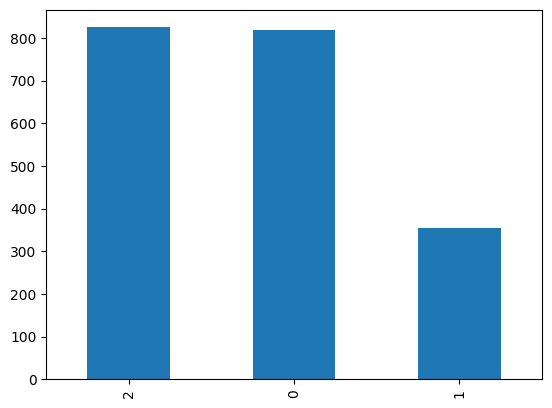

In [11]:
# plot the label counts
df['Y'].value_counts().plot(kind='bar')

In [12]:
df['text'][33]

"We're sorry say event cancelled due Covid- . The health wellbeing attendees, speakers staff top priority. Apologies disappointment may cause. All FAQs answered link below:"

In [13]:
import re

In [14]:
# Substitute 're with " are"
re.sub(r"'re\b", " are", df['text'][33])

'We are sorry say event cancelled due Covid- . The health wellbeing attendees, speakers staff top priority. Apologies disappointment may cause. All FAQs answered link below:'

In [15]:
# Removing the user mentions
df['text'][23]

'@ DowningStreet done ensure food essential products re-stocked supermarkets panic buying actively discouraged? It cannot left checkout staff police actions selfish profiteer'

In [16]:
# We will retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", df['text'][23])

'@ DowningStreet done ensure food essential products re-stocked supermarkets panic buying actively discouraged? It cannot left checkout staff police actions selfish profiteer'

In [17]:
# Remove the hashtags
df['text'][17]

'Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries Â\x93As COVID- spread, weÂ\x92ve seen significant increase people shopping online groceries,Â\x94 spokeswoman said statement. Â\x93Today resulted systems impact affecting ...'

In [18]:
re.sub("#", "", df['text'][17])

'Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries Â\x93As COVID- spread, weÂ\x92ve seen significant increase people shopping online groceries,Â\x94 spokeswoman said statement. Â\x93Today resulted systems impact affecting ...'

In [19]:
# Removing the Hyperlinks
re.sub(r"http\S+", "", df['text'][17])

'Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries Â\x93As COVID- spread, weÂ\x92ve seen significant increase people shopping online groceries,Â\x94 spokeswoman said statement. Â\x93Today resulted systems impact affecting ...'

In [20]:
# Retain on the alphabets (get rid of puntuations, special char, digits)
df['text'][87]

"Please hoard food water. There's absolutely need panic buy; supply chain completely interrupted. And all, please hoard sanitizing products; people really need them, probably you."

In [21]:
re.sub(r"[^a-zA-z]", " ", df['text'][87])

'Please hoard food water  There s absolutely need panic buy  supply chain completely interrupted  And all  please hoard sanitizing products  people really need them  probably you '

In [22]:
# Stop words Removal
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
len(nltk_stopwords)

179

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'eight', 'cry', 'side', 'it', 'between', 'about', 'beside', 'well', 'under', 'someone', 'further', 'itself', 'almost', 'whether', 'they', 'amongst', 'are', 'nothing', 'while', 'everyone', 'whole', 'because', 'on', 'nobody', 'though', 'cannot', 'per', 'both', 'top', 'wherever', 'ourselves', 'any', 'most', 'along', 'very', 'become', 'rather', 'whereupon', 'her', 'when', 'hereby', 'has', 'towards', 'these', 'where', 'already', 'and', 'one', 'those', 'without', 'so', 'mill', 'that', 'whoever', 'done', 'although', 'of', 'from', 'else', 'somewhere', 'among', 'give', 'into', 'whither', 'sincere', 'former', 'than', 'another', 'more', 'elsewhere', 'even', 'somehow', 'sometime', 'namely', 'sometimes', 'being', 'whereby', 'some', 'five', 'how', 'once', 'many', 'formerly', 'forty', 'after', 'please', 'such', 'been', 'con', 're', 'over', 'show', 'thereupon', 'moreover', 'then', 'get', 'were', 'throughout', 'onto', 'bottom', 'put', 'etc', 'anyhow', 'myself', 'found', 'own', 'am', 'no', 'now', 'or',

In [26]:
len(sklearn_stopwords)

318

In [27]:
# Find the common stopwords from NLTK & sklearn
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [28]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [29]:
# Text Normalization: Stemming or Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
df['text'][63].split()

['What',
 'K',
 'Consumers',
 'Told',
 'PYMNTS',
 'About',
 'How',
 'COVID-',
 'Changed',
 'Their',
 'Daily',
 'Lives',
 'via']

In [31]:
new_sent =  ''
for token in df['text'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ''

new_sent

'whatkconsumertoldpymntsabouthowcovid-changedtheirdailylifevia'

In [32]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 16.6 MB/s eta 0:00:00


In [33]:
import contractions
df['text'][24]

"UK poll indicates majority expect 's impact last - months (at March). We expect increase next ... See full results Coronavirus Consumer Confidence Tracker here:"

In [34]:
contractions.fix(df['text'][24])

"UK poll indicates majority expect 's impact last - months (at March). We expect increase next ... See full results Coronavirus Consumer Confidence Tracker here:"

#Defining the Cleaner Function

In [35]:
def text_cleaner_without_stopwords(text):
  new_text = re.sub(r"'s\b" , " is", text)
  new_text = re.sub("#", "", new_text)
  new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
  new_text = re.sub(r"http\S+", "", new_text)
  new_text = contractions.fix(new_text)
  new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
  new_text = new_text.lower().strip()

  cleaned_text = ''
  for token in new_text.split():
    cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [36]:
cleaned_text = [] # List of Cleaned text
for twt in df['text']:
  cleaned_text.append(text_cleaner_without_stopwords(twt))

cleaned_text[:5]

['advice ', 'coronavirus ', 'my ', 'me ', 'a ']

In [37]:
cleaned_text[22]

'we '

In [38]:
df['cleaned_text_w/o_sw'] = cleaned_text
df.head()

,text,Y,cleaned_text_w/o_sw
0,advice Talk neighbours family exchange phone n...,2,advice
1,Coronavirus Australia: Woolworths give elderly...,2,coronavirus
2,"My food stock one empty... PLEASE, panic, THER...",2,my
3,"Me, ready go supermarket outbreak. Not I'm par...",0,me
4,As news regionÂs first confirmed COVID- case ...,2,a


# **Data Visualization**

In [39]:
# Write a code to collect all the words from all the text into a single list
all_words = []
for t in df['text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['advice', 'Talk', 'neighbours', 'family', 'exchange', 'phone', 'numbers', 'create', 'contact', 'list', 'phone', 'numbers', 'neighbours', 'schools', 'employer', 'chemist', 'GP', 'set', 'online', 'shopping', 'accounts', 'poss', 'adequate', 'supplies', 'regular', 'meds', 'order', 'Coronavirus', 'Australia:', 'Woolworths', 'give', 'elderly,', 'disabled', 'dedicated', 'shopping', 'hours', 'amid', 'COVID-', 'outbreak', 'My', 'food', 'stock', 'one', 'empty...', 'PLEASE,', 'panic,', 'THERE', 'WILL', 'BE', 'ENOUGH']


11083

In [40]:
import matplotlib.pyplot as plt

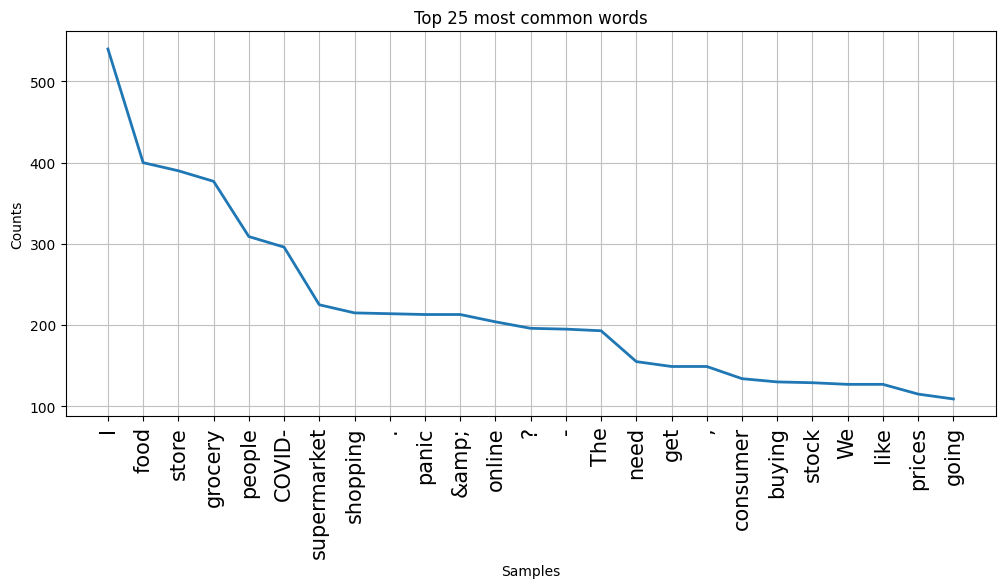

In [41]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [42]:
all_words = []
for t in df['cleaned_text_w/o_sw']:
  if t is not None:
    all_words.extend(t.split())

print(all_words[:50])

['advice', 'coronavirus', 'my', 'me', 'a', 'cashier', 'wa', 'due', 'for', 'all', 'due', 'caring', 'me', 'adara', 'line', 'mar', 'amazon', 'for', 'nation', 'the', 'we', 'we', 'downingstreet', 'uk', 'in', 'this', 'do', 'sealsoftheend', 'there', 'hole', 'retail', 'coronavirus', 'we', 'went', 'yes', 'worried', 'wife', 'now', 'we', 'curious', 'check', 'breaking', 'this', 'south', 'please', 'people', 'never', 'covid', 'everything', 'everyone']


In [43]:
len(set(all_words))

690

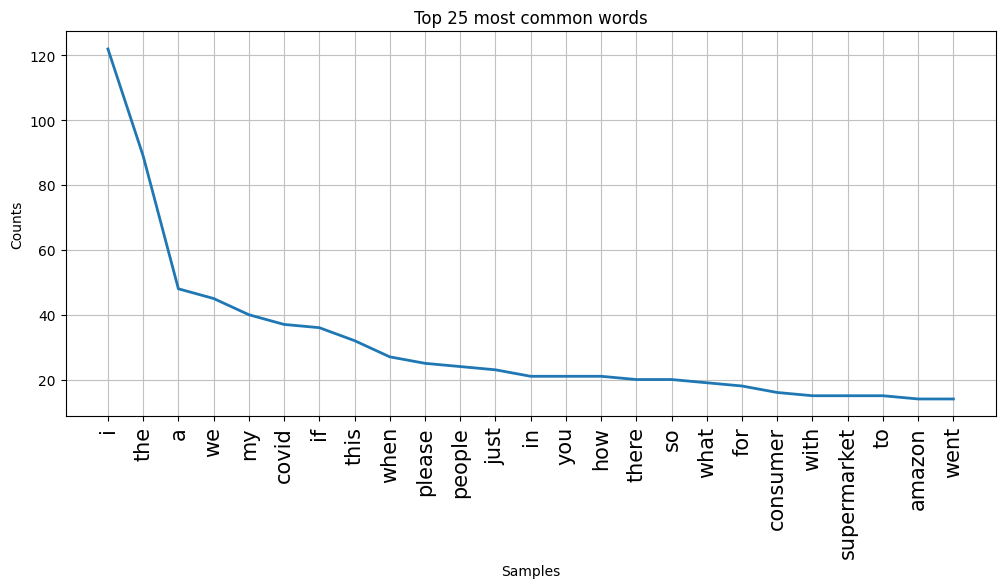

In [44]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [45]:
type(combined_stopwords)

set

In [46]:
def text_cleaner_with_stopwords(text):
  new_text = re.sub(r"'s\b" , " is", text)
  new_text = re.sub("#", "", new_text)
  new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
  new_text = re.sub(r"http\S+", "", new_text)
  new_text = contractions.fix(new_text)
  new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
  new_text = new_text.lower().strip()


  new_text = [token for token in new_text.split() if token not in combined_stopwords]

  new_text = [token for token in new_text if len(token)>2]

  cleaned_text = ''
  for token in new_text:
    cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [47]:
cleaned_text = list(df['text'].apply(text_cleaner_with_stopwords))
print(cleaned_text[:10])

['advice ', 'coronavirus ', 'food ', 'ready ', 'news ', 'cashier ', 'supermarket ', 'covid ', 'corona ', 'month ']


In [48]:
df.columns

Index(['text', 'Y', 'cleaned_text_w/o_sw'], dtype='object')

In [49]:
df['cleaned_text_with_sw'] = cleaned_text
df.head()

,text,Y,cleaned_text_w/o_sw,cleaned_text_with_sw
0,advice Talk neighbours family exchange phone n...,2,advice,advice
1,Coronavirus Australia: Woolworths give elderly...,2,coronavirus,coronavirus
2,"My food stock one empty... PLEASE, panic, THER...",2,my,food
3,"Me, ready go supermarket outbreak. Not I'm par...",0,me,ready
4,As news regionÂs first confirmed COVID- case ...,2,a,news


['advice', 'coronavirus', 'food', 'ready', 'news', 'cashier', 'supermarket', 'covid', 'corona', 'month', 'covid', 'caring', 'need', 'adara', 'line', 'mar', 'amazon', 'struggling', 'nation', 'covid', 'amazing', 'amazing', 'downingstreet', 'poll', 'preparation', 'morning', 'malicious', 'sealsoftheend', 'country', 'hole', 'retail', 'coronavirus', 'sorry', 'went', 'yes', 'worried', 'wife', 'supermarket', 'provide', 'curious', 'check', 'breaking', 'line', 'south', 'share', 'people', 'thought', 'covid', 'seeing', 'closed']


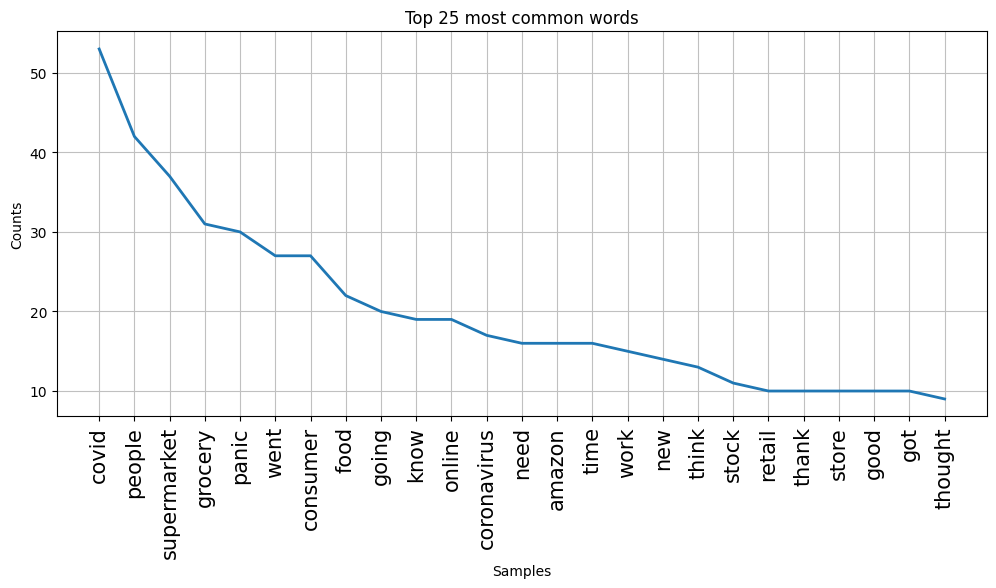

In [50]:
all_words = []
for t in df['cleaned_text_with_sw']:
  if t is not None:
    all_words.extend(t.split())

print(all_words[:50])

freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

# **Feature Extraction**

In [51]:
df.head()

,text,Y,cleaned_text_w/o_sw,cleaned_text_with_sw
0,advice Talk neighbours family exchange phone n...,2,advice,advice
1,Coronavirus Australia: Woolworths give elderly...,2,coronavirus,coronavirus
2,"My food stock one empty... PLEASE, panic, THER...",2,my,food
3,"Me, ready go supermarket outbreak. Not I'm par...",0,me,ready
4,As news regionÂs first confirmed COVID- case ...,2,a,news


In [52]:
df.shape

(2000, 4)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

df['cleaned_text_w/o_sw'] = df['cleaned_text_w/o_sw'].fillna('')

CV = CountVectorizer()
CV_features = CV.fit_transform(df['cleaned_text_w/o_sw'])

In [54]:
CV_features.shape

(2000, 680)

In [55]:
df.shape

(2000, 4)

In [56]:
CV_features[0]

<1x680 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [57]:
type(CV_features[0]) # each row is a compressed spare row

scipy.sparse._csr.csr_matrix

In [58]:
CV_features[0].todense() # decompressing the CSR data

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [59]:
import pandas as pd
data = pd.DataFrame(CV_features.todense())
data
# Document-Term-Matrix X = [N x p]
# N = no. of documents
# p = no. of unique words in the vocab & this is your D

,0,1,2,3,4,5,6,7,8,9,...,670,671,672,673,674,675,676,677,678,679
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
data.size/1e6 # these many elements/numbers are present in the data

1.36

In [61]:
import numpy as np
np.count_nonzero(data)

1812

In [62]:
100*np.count_nonzero(data)/data.size # percent of the non-zero elementsi nthe data

0.13323529411764706

In [63]:
CV.get_feature_names_out()[:50] # these are vocab words

array(['abilene', 'about', 'absolutely', 'actual', 'adara', 'address',
       'adjusted', 'adobeexpcloud', 'advice', 'after', 'ag', 'again',
       'ah', 'al', 'alert', 'all', 'almost', 'alright', 'also', 'altered',
       'alternative', 'although', 'amazon', 'america', 'american', 'amid',
       'amidst', 'amzn', 'an', 'and', 'animal', 'announced', 'another',
       'anthony', 'anticipated', 'anxious', 'any', 'anyone', 'appalling',
       'apparently', 'apple', 'ar', 'are', 'around', 'assume', 'at',
       'atlanta', 'au', 'austerity', 'australia'], dtype=object)

In [64]:
len(CV.get_feature_names_out())

680

In [65]:
CV_features[10].todense()  # decompressing the CSR data

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [66]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))

[array(['due'], dtype='<U14')]

# **Model building**

In [67]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(CV_features, df['Y'],test_size=0.25, stratify=df['Y'], random_state=42 )

In [68]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, Y_train)

print(LR.score(X_train, Y_train))
print(LR.score(X_test, Y_test))

0.6213333333333333
0.448


In [69]:
# L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)
LR1.fit(X_train, Y_train)

print(LR1.score(X_train, Y_train))  # train score
print(LR1.score(X_test, Y_test))    # test score

0.42733333333333334
0.412


In [70]:
# Cross-Validating the Logistic Regression Model
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [71]:
X = CV_features
Y = df['Y']

In [72]:
# Cross VALIDATE the LR2 model
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.06)
Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR2, X, Y, cv=Kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.42   0.4575 0.445  0.4125 0.41  ]
42.9 1.89


In [73]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR2, X, Y, cv=kfold, scoring='accuracy', return_train_score=True)

In [74]:
results

{'fit_time': array([0.00673985, 0.00426435, 0.0042944 , 0.00439382, 0.00420809]),
 'score_time': array([0.00139618, 0.00076652, 0.00095749, 0.0008173 , 0.00077605]),
 'test_score': array([0.42  , 0.4575, 0.445 , 0.4125, 0.41  ]),
 'train_score': array([0.611875, 0.6025  , 0.608125, 0.614375, 0.609375])}

In [75]:
print(results['train_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

[0.611875 0.6025   0.608125 0.614375 0.609375]
42.9 0.4


In [76]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = df['cleaned_text_w/o_sw']
Y = df['Y']
CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)

CV_pipe = Pipeline([('CV', CV), ('LR', LR1)])

results = cross_val_score(CV_pipe, X, Y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

41.3 0.53


In [77]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.3, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [78]:
CV_pipe.fit(X,Y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.3, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [79]:
len(CV_pipe['CV'].vocabulary_)

680

In [80]:
CV_pipe['CV'].vocabulary_

{'advice': 8,
 'coronavirus': 130,
 'my': 363,
 'me': 345,
 'cashier': 92,
 'wa': 633,
 'due': 162,
 'for': 202,
 'all': 15,
 'caring': 91,
 'adara': 4,
 'line': 309,
 'mar': 339,
 'amazon': 22,
 'nation': 367,
 'the': 583,
 'we': 643,
 'downingstreet': 157,
 'uk': 614,
 'in': 275,
 'this': 589,
 'do': 152,
 'sealsoftheend': 497,
 'there': 584,
 'hole': 256,
 'retail': 481,
 'went': 647,
 'yes': 675,
 'worried': 670,
 'wife': 657,
 'now': 388,
 'curious': 137,
 'check': 99,
 'breaking': 81,
 'south': 543,
 'please': 424,
 'people': 417,
 'never': 372,
 'covid': 134,
 'everything': 181,
 'everyone': 180,
 'why': 656,
 'dear': 142,
 'global': 218,
 'morning': 356,
 'of': 391,
 'thank': 581,
 'with': 661,
 'consumer': 125,
 'both': 76,
 'so': 537,
 'what': 648,
 'bought': 77,
 'seen': 501,
 'sadly': 487,
 'yeah': 674,
 'cn': 115,
 'it': 286,
 'hi': 250,
 'corona': 129,
 'pausing': 415,
 'on': 400,
 'lost': 323,
 'witham': 662,
 'love': 325,
 'an': 28,
 'au': 47,
 'at': 45,
 'just': 290,
 

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [96]:
LR1.classes_

array([0, 1, 2])

In [97]:
Y_test_predicted = LR1.predict(X_test)

In [98]:
Y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
cm = confusion_matrix(Y_test, Y_test_predicted, labels = LR1.classes_)
print(cm)

[[200   0   5]
 [ 88   0   1]
 [189   0  17]]


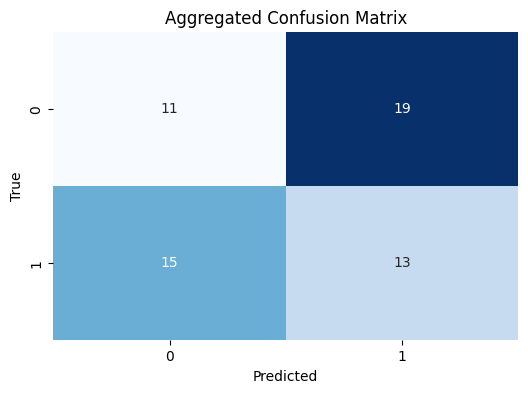

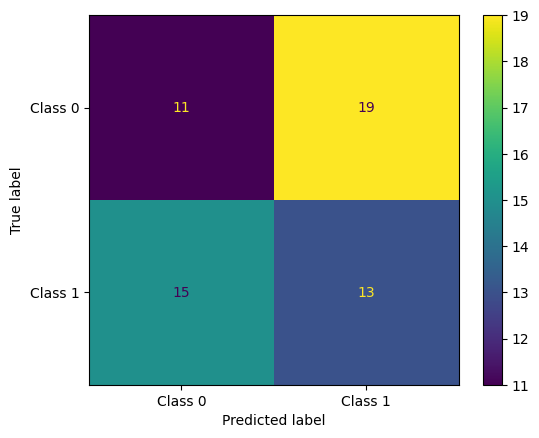

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Example 3D array representing multiple confusion matrices

confusion_matrices = np.random.randint(0, 10, size=(3, 2, 2))

# Aggregate the confusion matrices
overall_cm = np.sum(confusion_matrices, axis=0)

# Plot aggregated confusion matrix using ConfusionMatrixDisplay
cm_disp = ConfusionMatrixDisplay(confusion_matrix=overall_cm, display_labels=['Class 0', 'Class 1'])
plt.figure(figsize=(6, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
cm_disp.plot()
plt.show()
